<a href="https://colab.research.google.com/github/NimishPrakash/IBM-Data-Analyst-Capstone-Project/blob/main/2_Collecting_Data_Using_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

Download the webpage at the url


In [3]:
data = requests.get(url).text

Create a soup object


In [4]:
soup = BeautifulSoup(data,'html.parser')

Scrape the `Language name` and `annual average salary`.


In [5]:
table = soup.find('table')
table

<table>
<tbody>
<tr>
<td>No.</td>
<td>Language</td>
<td>Created By</td>
<td>Average Annual Salary</td>
<td>Learning Difficulty</td>
</tr>
<tr>
<td>1</td>
<td>Python</td>
<td>Guido van Rossum</td>
<td>$114,383</td>
<td>Easy</td>
</tr>
<tr>
<td>2</td>
<td>Java</td>
<td>James Gosling</td>
<td>$101,013</td>
<td>Easy</td>
</tr>
<tr>
<td>3</td>
<td>R</td>
<td>Robert Gentleman, Ross Ihaka</td>
<td>$92,037</td>
<td>Hard</td>
</tr>
<tr>
<td>4</td>
<td>Javascript</td>
<td>Netscape</td>
<td>$110,981</td>
<td>Easy</td>
</tr>
<tr>
<td>5</td>
<td>Swift</td>
<td>Apple</td>
<td>$130,801</td>
<td>Easy</td>
</tr>
<tr>
<td>6</td>
<td>C++</td>
<td>Bjarne Stroustrup</td>
<td>$113,865</td>
<td>Hard</td>
</tr>
<tr>
<td>7</td>
<td>C#</td>
<td>Microsoft</td>
<td>$88,726</td>
<td>Hard</td>
</tr>
<tr>
<td>8</td>
<td>PHP</td>
<td>Rasmus Lerdorf</td>
<td>$84,727</td>
<td>Easy</td>
</tr>
<tr>
<td>9</td>
<td>SQL</td>
<td>Donald D. Chamberlin, Raymond F. Boyce.</td>
<td>$84,793</td>
<td>Easy</td>
</tr>
<tr>
<td>10</t

Save the scrapped data into a file named *popular-languages.csv*


In [6]:
lang = []
for row in table.find_all('tr'):
  cols = row.find_all('td')
  language = cols[1].getText()
  creator = cols[2].getText()
  annual_salary = cols[3].getText()
  lang.append([language,creator,annual_salary])

In [7]:
df_lang = pd.DataFrame(lang[1:],columns=lang[0])
df_lang

,Language,Created By,Average Annual Salary
0,Python,Guido van Rossum,"$114,383"
1,Java,James Gosling,"$101,013"
2,R,"Robert Gentleman, Ross Ihaka","$92,037"
3,Javascript,Netscape,"$110,981"
4,Swift,Apple,"$130,801"
5,C++,Bjarne Stroustrup,"$113,865"
6,C#,Microsoft,"$88,726"
7,PHP,Rasmus Lerdorf,"$84,727"
8,SQL,"Donald D. Chamberlin, Raymond F. Boyce.","$84,793"
9,Go,"Robert Griesemer, Ken Thompson, Rob Pike.","$94,082"


In [8]:
df_lang.columns = ['Language','Creator','Annual Salary']
df_lang.to_csv('popular-languages.csv')

In [9]:
df = pd.read_csv('popular-languages.csv')
df

,Unnamed: 0,Language,Creator,Annual Salary
0,0,Python,Guido van Rossum,"$114,383"
1,1,Java,James Gosling,"$101,013"
2,2,R,"Robert Gentleman, Ross Ihaka","$92,037"
3,3,Javascript,Netscape,"$110,981"
4,4,Swift,Apple,"$130,801"
5,5,C++,Bjarne Stroustrup,"$113,865"
6,6,C#,Microsoft,"$88,726"
7,7,PHP,Rasmus Lerdorf,"$84,727"
8,8,SQL,"Donald D. Chamberlin, Raymond F. Boyce.","$84,793"
9,9,Go,"Robert Griesemer, Ken Thompson, Rob Pike.","$94,082"


In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Language,Creator,Annual Salary
0,Python,Guido van Rossum,"$114,383"
1,Java,James Gosling,"$101,013"
2,R,"Robert Gentleman, Ross Ihaka","$92,037"
3,Javascript,Netscape,"$110,981"
4,Swift,Apple,"$130,801"
5,C++,Bjarne Stroustrup,"$113,865"
6,C#,Microsoft,"$88,726"
7,PHP,Rasmus Lerdorf,"$84,727"
8,SQL,"Donald D. Chamberlin, Raymond F. Boyce.","$84,793"
9,Go,"Robert Griesemer, Ken Thompson, Rob Pike.","$94,082"


In [11]:
# Remove '$' and ',' from the 'Annual Salary' column
df['Annual Salary'] = df['Annual Salary'].str.replace('[\$,]', '', regex=True)

# Convert the 'Annual Salary' column to numeric
df['Annual Salary'] = pd.to_numeric(df['Annual Salary'])

In [12]:
df.head()

,Language,Creator,Annual Salary
0,Python,Guido van Rossum,114383
1,Java,James Gosling,101013
2,R,"Robert Gentleman, Ross Ihaka",92037
3,Javascript,Netscape,110981
4,Swift,Apple,130801


<Axes: xlabel='Language'>

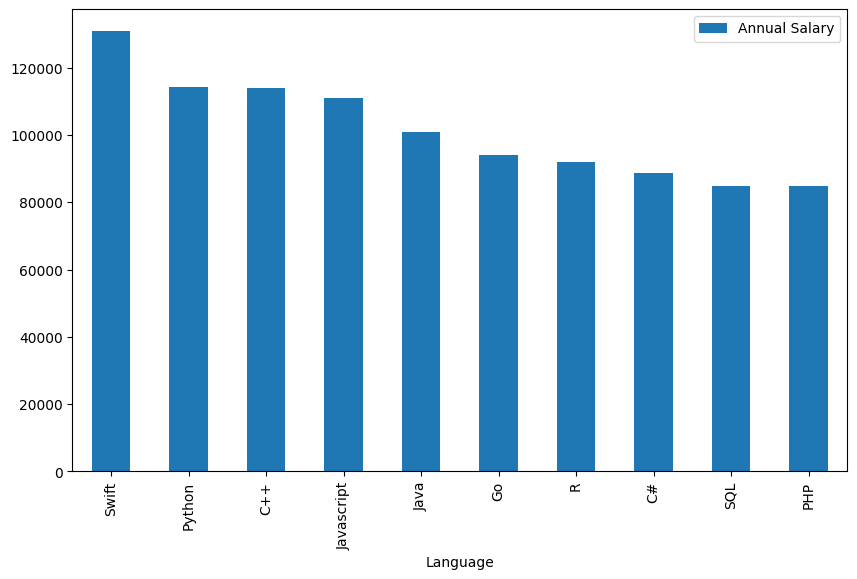

In [13]:
df_sorted = df.sort_values('Annual Salary', ascending=False)

df_sorted.plot(kind='bar',x='Language',y='Annual Salary',figsize=(10,6))

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
